Course Name: Pattern Recognition Lab, Course No: CSE 4214, Experiment Name: Designing a Minimum Distance to Class Mean Classifier, Name: Umme Habiba, Section: A1, ID: 170104004

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load train data

In [131]:
train_data=np.loadtxt("/content/drive/MyDrive/CSE4214/Assignment1/train.txt")
print(train_data)

[[ 2.  2.  1.]
 [ 3.  1.  1.]
 [-4.  3.  2.]
 [ 3.  3.  1.]
 [-1. -3.  1.]
 [ 2.  6.  2.]
 [ 4.  2.  1.]
 [-2. -2.  1.]
 [ 0.  0.  2.]
 [-2.  2.  2.]
 [-1. -1.  2.]
 [-4.  2.  2.]]


Load test data

In [132]:
test_data=np.loadtxt("/content/drive/MyDrive/CSE4214/Assignment1/test.txt")
print(test_data)

[[-1. -5.  1.]
 [ 3.  2.  1.]
 [-2.  1.  2.]
 [ 8.  2.  1.]
 [ 6. -1.  1.]
 [ 0.  2.  1.]
 [-3.  0.  2.]]


Task-1

In [133]:
#If 1 then let its  class A
classA =[]
for ar in train_data:
    if ar[2] == 1:
        classA.append([ar[0],ar[1]])

In [134]:
#If 2 then let its  class B
classB =[]
for ar in train_data:
    if ar[2] == 2:
        classB.append([ar[0],ar[1]])

In [135]:
#Separating test values and their class
testValues =[]
testClass =[]
for ar in test_data:
    testValues.append([ar[0],ar[1]])
    testClass.append(ar[2])
print('Value: ',testValues)
print('Class: ',testClass)

Value:  [[-1.0, -5.0], [3.0, 2.0], [-2.0, 1.0], [8.0, 2.0], [6.0, -1.0], [0.0, 2.0], [-3.0, 0.0]]
Class:  [1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0]


In [136]:
# list to np array
classA = np.array(classA)
classB = np.array(classB)
testValues = np.array(testValues)
testClass = np.array(testClass)
print('testValues class type',type(testClass))

testValues class type <class 'numpy.ndarray'>


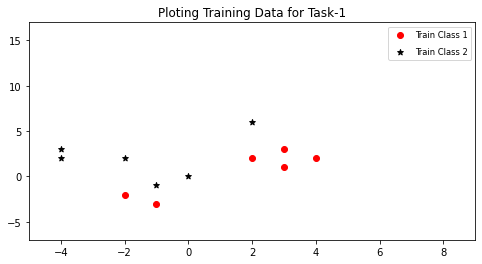

In [137]:
fig,ax = plt.subplots()
ax.set_title('Ploting Training Data for Task-1')
fig.set_figheight(4)
fig.set_figwidth(8)
plt.ylim(-7,17)#limit the figure in x axis
plt.xlim(-5,9)#limit the figure in y axis
ax.scatter(classA[:,0],classA[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(classB[:,0],classB[:,1],marker='*',color='k',label='Train Class 2')
legend = ax.legend(loc='upper right', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

Task-2

In [138]:
#mean of class a and class b
meanClassA = np.mean(classA,axis = 0)
meanClassB = np.mean(classB,axis = 0)
print(meanClassA)
print(meanClassB)

[1.5 0.5]
[-1.5  2. ]


In [139]:
predictClassA = [0]*len(testValues)
predictClassB = [0]*len(testValues)
predictClass = [0]*len(testValues)
tempValueClass = np.zeros((len(testValues),3))

In [140]:
for i in range(len(testValues)):
    predictClassA[i] = np.dot(np.transpose(meanClassA),testValues[i]-.5*np.dot(np.transpose(meanClassA),meanClassA))#g(x) function
    predictClassB[i] = np.dot(np.transpose(meanClassB),testValues[i]-.5*np.dot(np.transpose(meanClassB),meanClassB))#g(x) function
    if(predictClassA[i]>predictClassB[i]):
        tempValueClass[i][0] = testValues[i][0]
        tempValueClass[i][1] = testValues[i][1]
        tempValueClass[i][2] = 1
        predictClass[i] = 1
    else:
        tempValueClass[i][0] = testValues[i][0]
        tempValueClass[i][1] = testValues[i][1]
        tempValueClass[i][2] = 2
        predictClass[i] = 2

In [143]:
#let tempValueClass if 1 then its in class A
classtestA =[]
for ar in tempValueClass:
    if ar[2] == 1:
        classtestA.append([ar[0],ar[1]])

In [144]:
#let tempValueClass if 2 then its in class B
classtestB =[]
for a in tempValueClass:
    if a[2] == 2:
        classtestB.append([a[0],a[1]])

In [145]:
#convert the list in numpy array
classtestA =np.array(classtestA)
classtestB = np.array(classtestB)
predictClass = np.array(predictionClass)

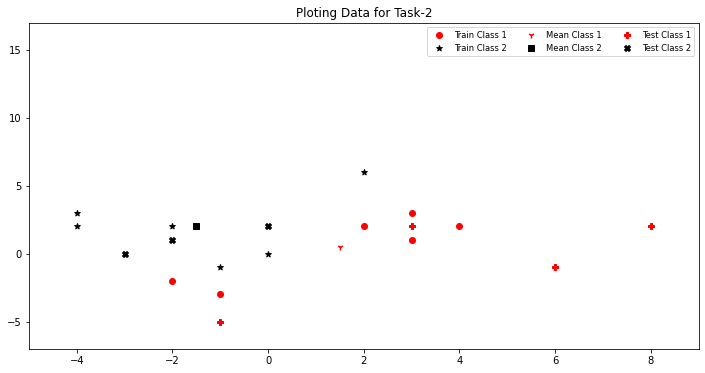

In [146]:
#plotting the meanclass,predicted class and training class
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)
plt.ylim(-7,17)#limit the figure in x axis
plt.xlim(-5,9)#limit the figure in y axis
ax.set_title('Ploting Data for Task-2')
ax.scatter(classA[:,0],classA[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(classB[:,0],classB[:,1],marker='*',color='k',label='Train Class 2')
ax.scatter(meanClassA[0],meanClassA[1],marker='1',color='r',label='Mean Class 1')
ax.scatter(meanClassB[0],meanClassB[1],marker='s',color='k',label='Mean Class 2')
ax.scatter(classtestA[:,0],classtestA[:,1],marker='P',color='r',label='Test Class 1')
ax.scatter(classtestB[:,0],classtestB[:,1],marker='X',color='k',label='Test Class 2')
legend = ax.legend(loc='upper right', shadow=False, fontsize='small',labelspacing=0.5,ncol=3)
legend.get_frame().set_facecolor('None')
plt.show()

Task-3

In [147]:
X=[]
Y=[]
c=0
for x in range(-4,8):
    j=-((meanClassA[0]-meanClassB[0])*x-.5*np.dot(np.transpose(meanClassA),meanClassA)+
        .5*np.dot(np.transpose(meanClassB),meanClassB))/(meanClassA[1]-meanClassB[1])
    X.append(x)
    Y.append(j)
    c+=1    


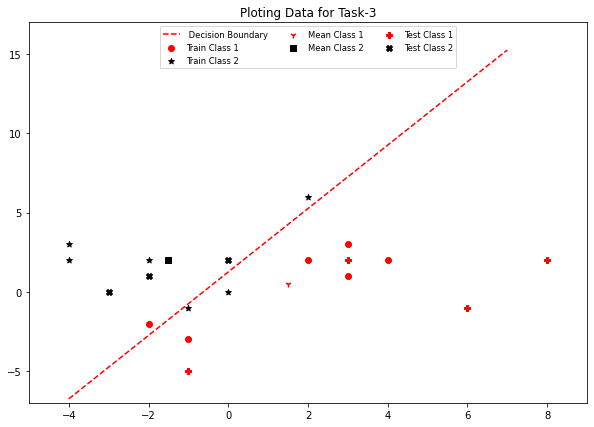

In [148]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)
plt.ylim(-7,17)#limit the figure in x axis
plt.xlim(-5,9)#limit the figure in y axis
ax.set_title('Ploting Data for Task-3')
ax.plot(X,Y,"--",label=' Decision Boundary',color="r")
ax.scatter(classA[:,0],classA[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(classB[:,0],classB[:,1],marker='*',color='k',label='Train Class 2')
ax.scatter(meanClassA[0],meanClassA[1],marker='1',color='r',label='Mean Class 1')
ax.scatter(meanClassB[0],meanClassB[1],marker='s',color='k',label='Mean Class 2')
ax.scatter(classtestA[:,0],classtestA[:,1],marker='P',color='r',label='Test Class 1')
ax.scatter(classtestB[:,0],classtestB[:,1],marker='X',color='k',label='Test Class 2')
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=0.5,ncol=3)
legend.get_frame().set_facecolor('None')
plt.show()

Task-4

In [149]:
Accuracy = 0
for x,y in zip(testClass,predictClass):
    if (x == y):
        Accuracy +=1
Accuracy = Accuracy/len(testClass)*100
print('Accuracy = ', Accuracy,'%')

Accuracy =  85.71428571428571 %
